# Meghana Ravikumar

### PCA, Gaussian Classifers for Digit Data

In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.io
from numpy import linalg as LA
import random
from sklearn import preprocessing
import scipy.stats
from pylab import pcolor, show, colorbar

### Question 2 -- Visualizing Level Sets

#### part a

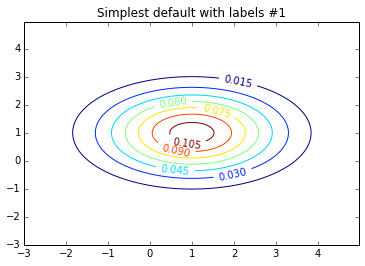

In [27]:
delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-3.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
a = math.sqrt(2)
Z1 = mlab.bivariate_normal(X, Y, a, 1.0, 1.0, 1.0, 0.0)
plt.figure()
CS = plt.contour(X, Y, Z1)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels #1')



#### part b

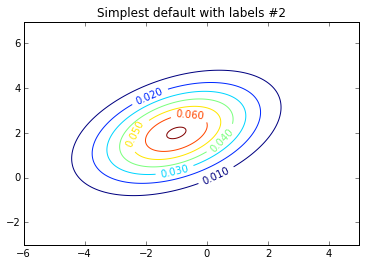

In [28]:
delta = 0.025
x2 = np.arange(-6.0, 5.0, delta)
y2 = np.arange(-3.0, 7.0, delta)
X2, Y2 = np.meshgrid(x2, y2)
a1 = math.sqrt(3)
b1 = math.sqrt(2)
Z2 = mlab.bivariate_normal(X2, Y2, a1, b1, -1.0, 2.0, 1.0)
plt.figure()
CS = plt.contour(X2, Y2, Z2)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels #2')

#### part c

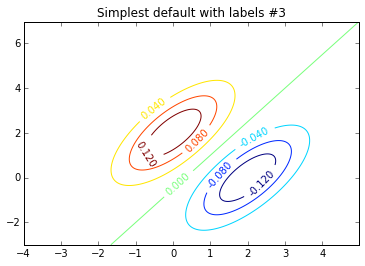

In [29]:
delta = 0.025
x2 = np.arange(-4.0, 5.0, delta)
y2 = np.arange(-3.0, 7.0, delta)
X2, Y2 = np.meshgrid(x2, y2)
Z3 = mlab.bivariate_normal(X2, Y2, 1.0, math.sqrt(2), 0.0, 2.0, 1.0)
Z4 = mlab.bivariate_normal(X2, Y2, 1.0, math.sqrt(2), 2.0, 0.0, 1.0)
Z = Z3-Z4
plt.figure()
CS = plt.contour(X2, Y2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels #3')

#### part d

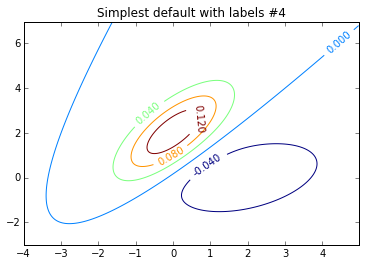

In [30]:
delta = 0.025
x2 = np.arange(-4.0, 5.0, delta)
y2 = np.arange(-3.0, 7.0, delta)
X2, Y2 = np.meshgrid(x2, y2)
Z5 = mlab.bivariate_normal(X2, Y2, 1.0, math.sqrt(2), 0.0, 2.0, 1.0)
Z6 = mlab.bivariate_normal(X2, Y2, math.sqrt(3), math.sqrt(2), 2.0, 0.0, 1.0)
Z = Z5-Z6
plt.figure()
CS = plt.contour(X2, Y2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels #4')

#### part e

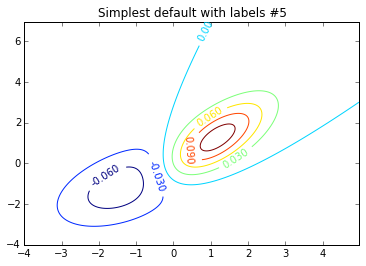

In [32]:
delta = 0.025
x2 = np.arange(-4.0, 5.0, delta)
y2 = np.arange(-4.0, 7.0, delta)
X2, Y2 = np.meshgrid(x2, y2)
Z7 = mlab.bivariate_normal(X2, Y2, 1.0, math.sqrt(2), 1.0, 1.0, 1.0)
Z8 = mlab.bivariate_normal(X2, Y2, math.sqrt(2), math.sqrt(2), -1.0, -1.0, 1.0)
Z = Z7-Z8
plt.figure()
CS = plt.contour(X2, Y2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels #5')

## Question 3 -- Visualizing Eigenvectors

#### Want to sample from $X_1$ ~ N(3,9) and $X_2$ ~ (1/2)$X_1$ + N(4,4)
#### Calculate sample mean and covariance matrix of the samples

In [338]:
mu_x1, sigma_x1 = 3,3 #mean, SD
mu_x2, sigma_x2 = 4,2
samples_x1 = np.random.normal(mu_x1, sigma_x1, 100)
samples_x2 = np.random.normal(mu_x2, sigma_x2, 100)
for ind1 in range(len(samples_x1)):
    samples_x2[ind1] = samples_x2[ind1] + 0.5*samples_x1[ind1]
total_samples = samples_x1 + samples_x2
sample_means = np.array([[np.mean(samples_x1)], [np.mean(samples_x2)]])
adjusted_samples_x1 = samples_x1 - sample_means[0]
adjusted_samples_x2 = samples_x2 - sample_means[1]

In [339]:
covariance_matrix = np.cov(samples_x1, samples_x2)
print "here is the covariance matrix:"
print covariance_matrix
eigenvalues, eigenvectors = LA.eig(covariance_matrix)
print "the eigenvalues for the covariance matrix are:", eigenvalues
print "the eigenvectors for the covariance matrix are:", eigenvectors

here is the covariance matrix:
[[ 13.21268679   5.58718739]
 [  5.58718739   6.03736241]]
the eigenvalues for the covariance matrix are: [ 16.26490283   2.98514637]
the eigenvectors for the covariance matrix are: [[ 0.87758774 -0.47941606]
 [ 0.47941606  0.87758774]]


#### plotting the points and the eigenvectors in x-space
#### the arrows are in the direction of the eigenvectors with the magnitude of their respective eigenvalues

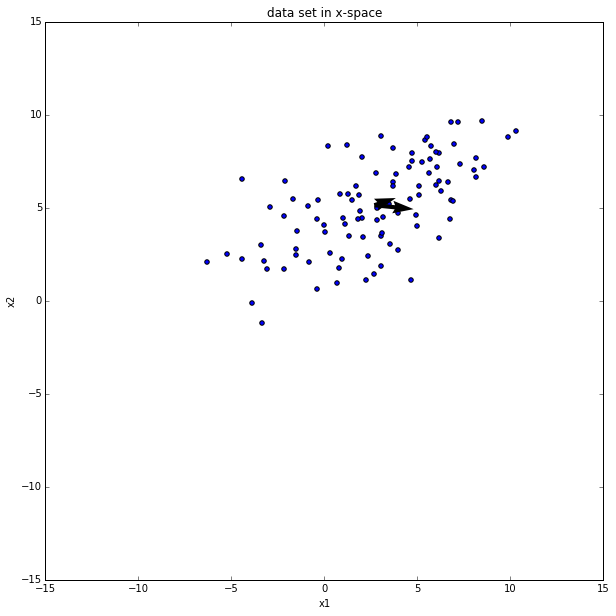

In [342]:
plt.figure(figsize=(10,10))
plt.ylabel("x2")
plt.xlabel("x1")
plt.title("data set in x-space")
plt.ylim(-15,15)
plt.xlim(-15,15)
plt.scatter(samples_x1, samples_x2)
plt.quiver(sample_means[0], sample_means[1], eigenvalues[0]*eigenvectors[:,0], eigenvalues[1]*eigenvectors[:,1])
plt.show()

#### choosing principal component to form feature vector (principal component has highest eigenvalue)
#### the feature vector that is chosen fits the data points the best and the secondary feature vector defines the noise of the data

In [343]:
## vectors already ordered by largest eigenvalue
U = eigenvectors
U_transpose = eigenvectors.T
data_adjusted = np.vstack((adjusted_samples_x1, adjusted_samples_x2)) #shape = (2,100)
x_rotated = np.dot(U_transpose,data_adjusted)

#### plotting rotated data set in eigenspace
#### The data is now defined in the eigenspace where the axes of the space are defined by the eigenvectors. In this case, the x-axis is defined by the principal component of the eigenvector matrix and the y-axis is defined by the secondary (noise) component of the eigenvector matrix. 

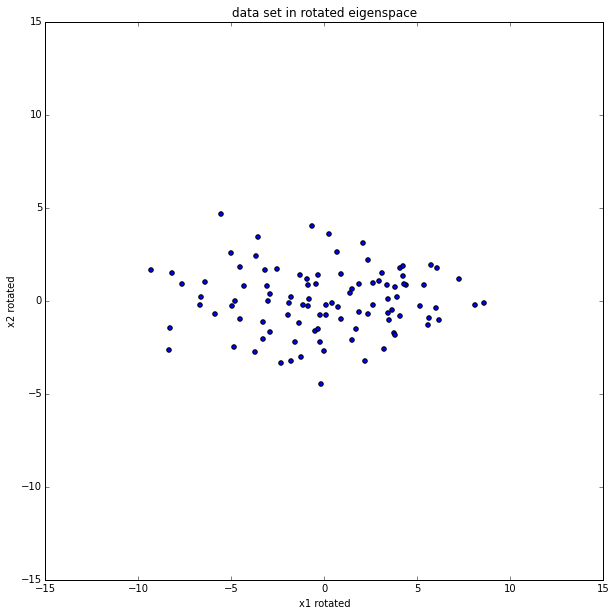

In [344]:
plt.figure(figsize=(10,10))
plt.ylabel("x2 rotated")
plt.xlabel("x1 rotated")
plt.title("data set in rotated eigenspace")
plt.ylim(-15,15)
plt.xlim(-15,15)
plt.scatter(x_rotated[0], x_rotated[1])

## Question 5: Classification Multivariate Gaussian

## QDA and LDA classifiers


### The QDA and LDA models are fit to the given data sets to predict the true labels of the test sets. The LDA method classifies a data point using one overall covariance matrix, the prior distribution for each class, and the estimated means for each class. The QDA method classifies a data point using a covariance marix for each class, the prior distribution for each class, and the estimated means for each class. 

In [358]:
import csv
from scipy.stats import multivariate_normal

## Digit dataset

### Load Data

In [370]:
digit_training= scipy.io.loadmat('data/digit_dataset/train.mat')
digit_testing = scipy.io.loadmat('data/digit_dataset/test.mat')
digit_training_labels = digit_training['train_labels']
digit_train_images = digit_training['train_images']
digit_test_images = digit_testing['test_images']

### Flatten and normalize data

In [371]:
def normalizing_data(digit_train_images):
    digit_training_images = np.zeros((60000,784))
    for ind in range(60000):
        reshaped_data = digit_train_images[:,:,ind].reshape(784)
        digit_training_images[ind] = reshaped_data
    normalized_train_images = preprocessing.normalize(digit_training_images,'l2')
    return digit_training_images

In [372]:
dataset_training_images = normalizing_data(digit_train_images)

In [373]:
def processing_test(digit_test_images):
    data_test_flattend = np.zeros((10000,784))
    for t in range(10000):
        temp = digit_test_images[t,:].reshape(28,28).T
        flatten = temp.reshape(784)
        data_test_flattend[t] = flatten
    #normalized_test_images = preprocessing.normalize(data_test_flattend,'l2')
    return data_test_flattend

In [374]:
data_test_flattend = processing_test(digit_test_images)

In [375]:
def splitting_data(dataset_training_images, dataset_training_labels):
    ##creating validation data set 
    ## initializes zero matrices in numpy 
    validation_indeces = random.sample(range(0,60000), 10000)

    new_training_data = np.zeros((50000,784))
    training_labels = np.zeros(50000)

    validation_data= np.zeros((10000,784))
    validation_labels = np.zeros(10000)

    tdata_i = 0
    vdata_i = 0

    for ind in range(0,60000):
        if ind in validation_indeces:
            validation_data[vdata_i] = dataset_training_images[ind,:]
            validation_labels[vdata_i] = dataset_training_labels[ind]
            vdata_i = vdata_i + 1 
        else:
            new_training_data[tdata_i] = dataset_training_images[ind,:]
            training_labels[tdata_i] = dataset_training_labels[ind]
            tdata_i = tdata_i + 1
    return (new_training_data, training_labels, validation_data, validation_labels)

In [376]:
(new_training_data, training_labels, validation_data, validation_labels) = splitting_data(dataset_training_images, digit_training_labels)

In [377]:
def meanEstimate(digit_set): #will take in a matrix for a class
    return np.mean(digit_set, axis = 0).reshape(784)

def prior(digit_set,numSample): #will take in a matrix for a class-- call shape
    shape = digit_set.shape
    return float(shape[0])/float(numSample)

def cov_overall(list_cov): #takes in list of lda covariance matrices
    summed = np.sum(list_cov)/10
    overall = summed + np.identity(784)*(math.pow(10,-6))
    return overall

def LDA(CovMatrix_all_inv, estimatedMeans, classPriors, testing_image):
    discriminants = [] #find max and return index as predicted class
    for c in range(10):
        temp = np.dot(testing_image, CovMatrix_all_inv)
        pt1 = np.dot(temp,estimatedMeans[c])
        temp2 = np.dot(CovMatrix_all_inv,estimatedMeans[c])
        pt2 = -0.5*np.dot(estimatedMeans[c].T, temp2)
        pt3 = np.log(classPriors[c])
        currDiscriminant = pt1 + pt2 + pt3
        discriminants.append(currDiscriminant)
    digitclass = discriminants.index(max(discriminants))
    return digitclass

### Sampling data to find optimal number of training samples for each type of classifier

In [378]:
def sampling(validation_data, validation_labels, new_training_data, training_labels):
    #print "in sampling_LDA"
    numSamples = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
    #numSamples = [100]
    errorRates_LDA = []
    errorRates_QDA = []
    for nSample in numSamples:
        
        print "we're on sample:"
        print nSample
        
        mean_estimates = []
        cov_all = []
        all_priors = []
        digits_all=[] #will store all the classes by index of list
        randomTrain = random.sample(range(0,50000), nSample) 
        for i in range(10):
            #digits_all.append(np.zeros((1,784))) #initializes training data to be stored in each index
            digits_all.append(np.array([]))
        for ranT in range(0,nSample):
            index = int(training_labels[randomTrain[ranT]]) 
            temp = new_training_data[randomTrain[ranT], :].reshape(1,784)

            if len(digits_all[index]) ==0:
                digits_all[index] = new_training_data[randomTrain[ranT], :]
            else:
                digits_all[index] = np.vstack((digits_all[index],new_training_data[randomTrain[ranT], :]))
        
        for digit_set in digits_all:
            mean_estimates.append(meanEstimate(digit_set)) #returns 781, vector
            cov_all.append(np.cov(digit_set.T))
            all_priors.append(prior(digit_set, nSample))
        
        #calculate overall cov
        cov_all_calc = cov_overall(cov_all)
        cov_all_inv = np.linalg.inv(cov_all_calc)
        predictions_LDA = []
        
        for v_data in validation_data:
            predictions_LDA.append(LDA(cov_all_inv, mean_estimates, all_priors, v_data))
        
        conditional_QDA = [multivariate_normal.logpdf(validation_data, mean=mean_estimates[c],
                                                cov=cov_all[c] + (0.4)*np.identity(784))
                                                for c in xrange(10)]
        posteriors_QDA = np.array(conditional_QDA).T + np.log(all_priors)
        predictions_QDA = np.argmax(posteriors_QDA, axis=1)
        
        #calculate error rate
        errorRate_LDA = (sum(predictions_LDA != validation_labels))/(float(len(validation_labels)))
        errorRates_LDA.append(errorRate_LDA)

        errorRate_QDA = (sum(predictions_QDA != validation_labels))/(float(len(validation_labels)))
        errorRates_QDA.append(errorRate_QDA)
        print "The error rate for LDA:"
        print errorRate_LDA
        print "The error rate for QDA:"
        print errorRate_QDA
        
    return (errorRates_LDA, errorRates_QDA)

In [379]:
(LDA_errors,QDA_errors) = sampling(validation_data, validation_labels, new_training_data, training_labels)

we're on sample:
100
The error rate for LDA:
0.3828
The error rate for QDA:
0.3611
we're on sample:
200
The error rate for LDA:
0.3151
The error rate for QDA:
0.2067
we're on sample:
500
The error rate for LDA:
0.2578
The error rate for QDA:
0.1476
we're on sample:
1000
The error rate for LDA:
0.2616
The error rate for QDA:
0.1131
we're on sample:
2000
The error rate for LDA:
0.2481
The error rate for QDA:
0.1585
we're on sample:
5000
The error rate for LDA:
0.2387
The error rate for QDA:
0.2916
we're on sample:
10000
The error rate for LDA:
0.2459
The error rate for QDA:
0.2203
we're on sample:
30000
The error rate for LDA:
0.2415
The error rate for QDA:
0.2132
we're on sample:
50000
The error rate for LDA:
0.2408
The error rate for QDA:
0.2255


In [382]:
(LDA_errors2,QDA_errors2) = sampling(validation_data, validation_labels, new_training_data, training_labels)

we're on sample:
100
The error rate for LDA:
0.3577
The error rate for QDA:
0.3007
we're on sample:
200
The error rate for LDA:
0.3109
The error rate for QDA:
0.2095
we're on sample:
500
The error rate for LDA:
0.267
The error rate for QDA:
0.1711
we're on sample:
1000
The error rate for LDA:
0.2471
The error rate for QDA:
0.1373
we're on sample:
2000
The error rate for LDA:
0.2494
The error rate for QDA:
0.1672
we're on sample:
5000
The error rate for LDA:
0.2373
The error rate for QDA:
0.3305
we're on sample:
10000
The error rate for LDA:
0.2417
The error rate for QDA:
0.2206
we're on sample:
30000
The error rate for LDA:
0.2409
The error rate for QDA:
0.2212
we're on sample:
50000
The error rate for LDA:
0.2408
The error rate for QDA:
0.2255


###Plotting error rates against sample size

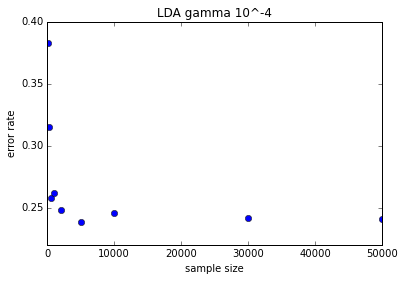

In [383]:
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000],  LDA_errors,'bo', label = "LDA")
plt.xlabel('sample size')
plt.ylabel('error rate')
plt.title('LDA gamma 10^-4')

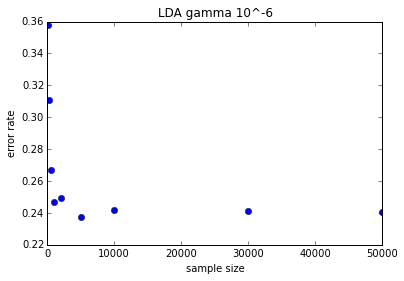

In [384]:
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000],  LDA_errors2,'bo', label = "LDA")
plt.xlabel('sample size')
plt.ylabel('error rate')
plt.title('LDA gamma 10^-6')

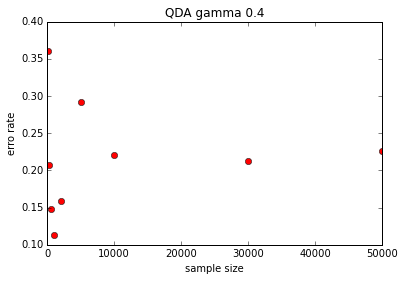

In [385]:
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000], QDA_errors,'ro', label = "QDA")
plt.xlabel('sample size')
plt.ylabel('erro rate')
plt.title('QDA gamma 0.4')

#### As seen in the plots above, the LDA classifier works better with the data and is used to classify the test data. This could be because the LDA classifier is less likely to over-fit and is not as skewed by outliers as the QDA classifiers. The decision boundary for the LDA will be linear classifiers/hyperplanes cutting the space whereas the QDA will be able to generate boundary lines that are quadratic that create a tighter fit for the data. Due to these varying decision boundaries, the LDA is more likely to under-fit and the QDA is more likely to over-fit. 

In [386]:
def plottingMatrix(estimatedCov):
    pcolor(estimatedCov, cmap='bwr', vmin=-0.0015 , vmax=0.0015)
    colorbar() 
    show()

#### Within the training model function, each class of the digit data set is modeled as a Gaussian distribution using MLE. As shown below, if we have $X_1, X_2, ..., X_N$ iid observations, each observation has an estimated mean and covariance matrix. The estimated mean is a vector that is calculated as the average of each feature for the observation. So an observation with 10 features would have an estimated mean vector of dimensions (1,10), where each column represents the average of its features. The covariance matrix for the class is calculated by grouping the class datasets and calculating the covariance of the features. The covariance matrix will express how the features of the class correlate with one another. As seen in the covariance matrices generated below, the more shaded an area, the more correlated the features are. This indicates that those features are most likely important in classifying data.

In [387]:
def training_model(new_training_data, training_labels, data_test_flattend):
    mean_estimates = []
    cov_all = []
    all_priors = []
    digits_all=[] #will store all the classes by index of list
    for i in range(10):
        digits_all.append(np.array([]))
    
    for ranT in range(50000):
        index = int(training_labels[ranT]) 
        temp = new_training_data[ranT, :].reshape(1,784)

        if len(digits_all[index]) ==0:
            digits_all[index] = new_training_data[ranT, :]
        else:
            digits_all[index] = np.vstack((digits_all[index],new_training_data[ranT, :]))
        
    for digit_set in digits_all:
        mean_estimates.append(meanEstimate(digit_set)) #returns 781, vector
        cov_all.append(np.cov(digit_set.T))
        all_priors.append(prior(digit_set, 50000))
    
    #plot covariance matrices
    for cov_matrix in cov_all:
        plottingMatrix(cov_matrix)
    
    #calculate overall cov
    cov_all_calc = cov_overall(cov_all)
    cov_all_inv = np.linalg.inv(cov_all_calc)
    predictions_LDA = []
        
    for t_data in data_test_flattend:
        predictions_LDA.append(LDA(cov_all_inv, mean_estimates, all_priors, t_data))

    return predictions_LDA



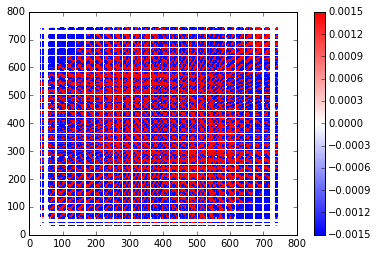

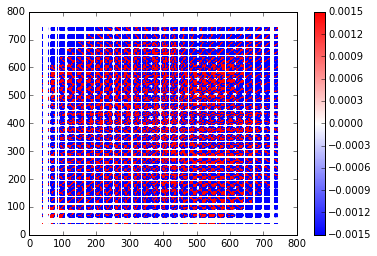

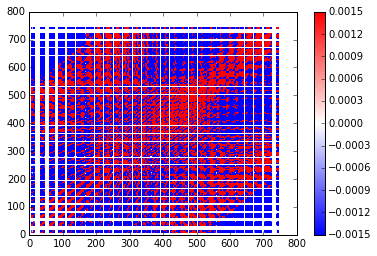

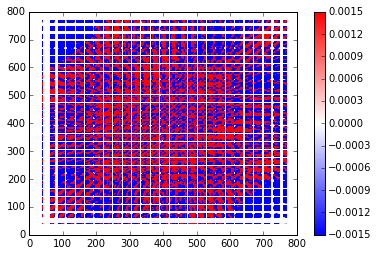

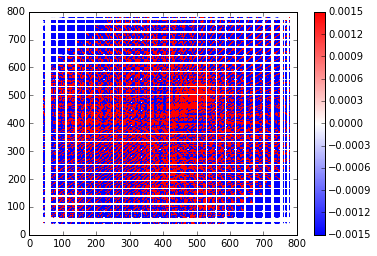

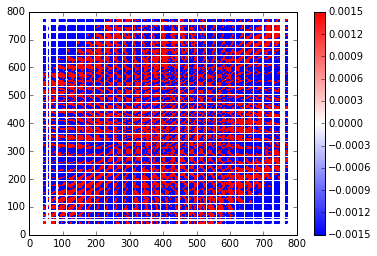

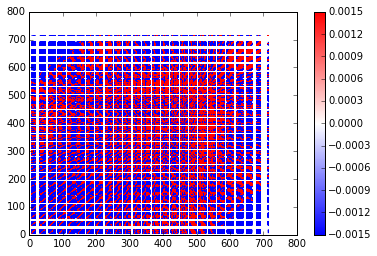

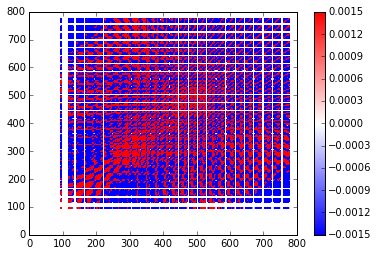

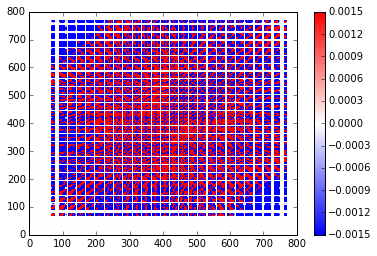

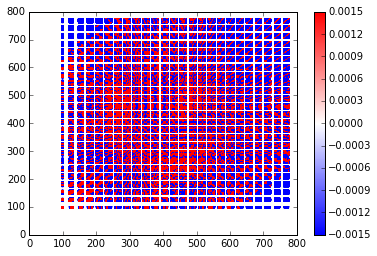

In [388]:
predictions_model_LDA = training_model(new_training_data, training_labels, data_test_flattend)

#### creating csv file for Kaggle - highest score ~0.77 accuracy 

In [389]:
with open('digit_predictions.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    d = 1
    for digpred in predictions_model_LDA:
        writer.writerow([d,int(digpred)])
        d = d+ 1

## Spam dataset

In [359]:
spam_ham_data_training = scipy.io.loadmat('data/spam_dataset/spam_data.mat')['training_data']
spam_ham_data_training = preprocessing.normalize(spam_ham_data_training)
spam_ham_labels = scipy.io.loadmat('data/spam_dataset/spam_data.mat')['training_labels'][0]
spam_ham_data_test = scipy.io.loadmat('data/spam_dataset/spam_data.mat')['test_data']

In [360]:
def splitting_ham(spam_ham_data_training, spam_ham_labels):
    ##creating validation data set 
    ## initializes zero matrices in numpy 
    validation_indeces = random.sample(range(0,len(spam_ham_data_training)), 1000)

    spam_training_data = np.zeros((5172-1000,32))
    spam_labels = np.zeros(5172-1000)

    validation_data= np.zeros((1000,32))
    validation_labels = np.zeros(1000)

    tdata_i = 0
    vdata_i = 0

    for ind in range(0,5172):
        if ind in validation_indeces:
            validation_data[vdata_i] = spam_ham_data_training[ind,:]
            validation_labels[vdata_i] = spam_ham_labels[ind]
            vdata_i = vdata_i + 1 
        else:
            spam_training_data[tdata_i] = spam_ham_data_training[ind,:]
            spam_labels[tdata_i] = spam_ham_labels[ind]
            tdata_i = tdata_i + 1
    return (spam_training_data, spam_labels, validation_data, validation_labels)

In [361]:
(spam_training_data, spam_labels, validation_data, validation_labels) = splitting_ham(spam_ham_data_training, spam_ham_labels)

In [362]:
def meanEstimate_spam(spam_set): #will take in a matrix for a class
    return np.mean(spam_set, axis = 0).reshape(32)

def prior_spam(spam_set,numSample): #will take in a matrix for a class-- call shape
    shape = spam_set.shape
    return float(shape[0])/float(numSample)

def cov_overall_spam(list_cov): #takes in list of lda covariance matrices
    summed = np.sum(list_cov)/2
    overall = summed + np.identity(32)*(math.pow(10,-6))
    return overall

def LDA_SPAM(CovMatrix_all_inv, estimatedMeans, classPriors, testing_image):
    discriminants = [] #find max and return index as predicted class
    for c in range(2):
        temp = np.dot(testing_image, CovMatrix_all_inv)
        pt1 = np.dot(temp,estimatedMeans[c])
        temp2 = np.dot(CovMatrix_all_inv,estimatedMeans[c])
        pt2 = -0.5*np.dot(estimatedMeans[c].T, temp2)
        pt3 = np.log(classPriors[c])
        currDiscriminant = pt1 + pt2 + pt3
        discriminants.append(currDiscriminant)
    digitclass = discriminants.index(max(discriminants))
    return digitclass

In [363]:
def sampling_HAM(validation_data, validation_labels, new_training_data, training_labels):
    #print "in sampling_LDA"
    numSamples = [100, 200, 500, 1000, 2000, 4000]
    #numSamples = [100]
    errorRates_LDA = []
    errorRates_QDA = []
    for nSample in numSamples:
        
        print "we're on sample:"
        print nSample
        
        mean_estimates = []
        cov_all = []
        all_priors = []
        digits_all=[] #will store all the classes by index of list
        randomTrain = random.sample(range(0,4000), nSample) 
        for i in range(2):
            #digits_all.append(np.zeros((1,784))) #initializes training data to be stored in each index
            digits_all.append(np.array([]))
        for ranT in range(0,nSample):
            index = int(training_labels[randomTrain[ranT]]) 
            temp = new_training_data[randomTrain[ranT], :].reshape(1,32)

            if len(digits_all[index]) ==0:
                digits_all[index] = new_training_data[randomTrain[ranT], :]
            else:
                digits_all[index] = np.vstack((digits_all[index],new_training_data[randomTrain[ranT], :]))
        
        for digit_set in digits_all:
            mean_estimates.append(meanEstimate_spam(digit_set)) 
            cov_all.append(np.cov(digit_set.T))
            all_priors.append(prior_spam(digit_set, nSample))
        
        #calculate overall cov
        cov_all_calc = cov_overall_spam(cov_all)
        cov_all_inv = np.linalg.inv(cov_all_calc)
        predictions_LDA = []
        
        for v_data in validation_data:
            predictions_LDA.append(LDA_SPAM(cov_all_inv, mean_estimates, all_priors, v_data))
        
        conditional_QDA = [multivariate_normal.logpdf(validation_data, mean=mean_estimates[c],
                                                cov=cov_all[c] + (0.4)*np.identity(32))
                                                for c in xrange(2)]
        posteriors_QDA = np.array(conditional_QDA).T + np.log(all_priors)
        predictions_QDA = np.argmax(posteriors_QDA, axis=1)
        
        #calculate error rate
        errorRate_LDA = (sum(predictions_LDA != validation_labels))/(float(len(validation_labels)))
        errorRates_LDA.append(errorRate_LDA)

        errorRate_QDA = (sum(predictions_QDA != validation_labels))/(float(len(validation_labels)))
        errorRates_QDA.append(errorRate_QDA)
        
        print "The error rate for LDA:"
        print errorRate_LDA
        print "The error rate for QDA:"
        print errorRate_QDA
        
    return (errorRates_LDA, errorRates_QDA)

In [364]:
(errorRates_LDA, errorRates_QDA) = sampling_HAM(validation_data, validation_labels, spam_training_data, spam_labels)

we're on sample:
100
The error rate for LDA:
0.213
The error rate for QDA:
0.256
we're on sample:
200
The error rate for LDA:
0.212
The error rate for QDA:
0.29
we're on sample:
500
The error rate for LDA:
0.211
The error rate for QDA:
0.291
we're on sample:
1000
The error rate for LDA:
0.209
The error rate for QDA:
0.291
we're on sample:
2000
The error rate for LDA:
0.206
The error rate for QDA:
0.291
we're on sample:
4000
The error rate for LDA:
0.199
The error rate for QDA:
0.291


### Plotting error rate vs. number of training data

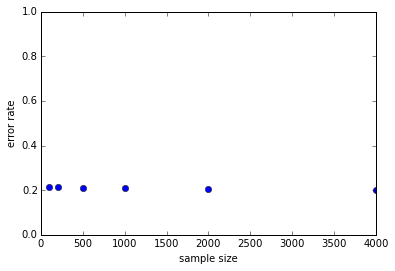

In [365]:
plt.plot([100, 200, 500, 1000, 2000, 4000],  errorRates_LDA,'bo', label = "LDA")
plt.ylim([0,1])
plt.xlabel('sample size')
plt.ylabel('error rate')

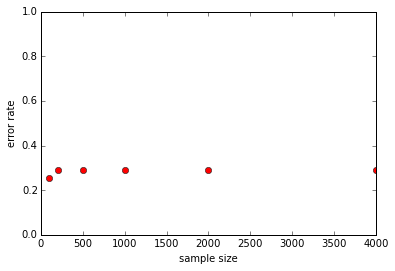

In [366]:
plt.plot([100, 200, 500, 1000, 2000, 4000],  errorRates_QDA,'ro', label = "QDA")
plt.xlabel('sample size')
plt.ylim([0,1])
plt.ylabel('error rate')

#### As seen above, both the QDA and LDA models fit the model with low error rates. As both models seem to have similar error rates, QDA was chosen as the spam data set is smaller than that of the digits, and a classifier that takes into account each class's covariance matrix is less likely to under-fit.

In [367]:
def training_model_SPAM(new_training_data, training_labels, data_test_flattend):
    mean_estimates = []
    cov_all = []
    all_priors = []
    digits_all=[] #will store all the classes by index of list
    for i in range(2):
        digits_all.append(np.array([]))
    
    for ranT in range(len(training_labels)):
        index = int(training_labels[ranT]) 
        temp = new_training_data[ranT, :].reshape(1,32)

        if len(digits_all[index]) ==0:
            digits_all[index] = new_training_data[ranT, :]
        else:
            digits_all[index] = np.vstack((digits_all[index],new_training_data[ranT, :]))
        
    for digit_set in digits_all:
        mean_estimates.append(meanEstimate_spam(digit_set))
        cov_all.append(np.cov(digit_set.T))
        all_priors.append(prior_spam(digit_set, 5172))
         
    conditional_QDA = [multivariate_normal.logpdf(data_test_flattend, mean=mean_estimates[c],
                                                cov=(cov_all[c] + (0.4)*np.identity(32)))
                                                for c in xrange(2)]
    
    posteriors_QDA = np.array(conditional_QDA).T + np.log(all_priors)
    predictions_QDA = np.argmax(posteriors_QDA, axis=1)
    return predictions_QDA

In [368]:
predictions_QDA_spam = training_model_SPAM(spam_ham_data_training, spam_ham_labels, spam_ham_data_test)

#### creating csv file for Kaggle. highest score ~ 0.70

In [369]:
with open('spam_predictions.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    sh = 1
    for shpred in predictions_QDA_spam:
        writer.writerow([sh,int(shpred)])
        sh = sh + 1

### Question 6: Linear Least Squares Regression

### The following fits a linear model to a set of housing data. It solves the following optimization problem: find w that minimizes $|Xw-y|^2$ where X is the data, y the true values, and w is the weights that minimizes the least squared loss function.

In [391]:
dataset_training_housing=scipy.io.loadmat('data/housing_dataset/housing_data.mat')
X_train = dataset_training_housing['Xtrain']
Y_train = dataset_training_housing['Ytrain']
X_validate = dataset_training_housing['Xvalidate']
Y_validate = dataset_training_housing['Yvalidate']

In [392]:
def calculatingPseudoInverse(X_dim_train):
    X_T = X_dim_train.T
    XTX = np.dot(X_T, X_dim_train)
    XTX_inverse = np.linalg.inv(XTX)
    pseudoinverse = np.dot(XTX_inverse, X_T)
    return pseudoinverse

In [393]:
def calculateRSS(y_true, y_predicted):
    difference = np.subtract(y_predicted, y_true)
    sqr = np.square(difference)
    return np.sum(sqr)

In [394]:
def training(X_train, Y_train):
    new_dim = np.ones((19440, 1))
    X_dim_train = np.hstack((X_train, new_dim))
    pseudoInverse = calculatingPseudoInverse(X_dim_train)
    trained_weights = np.dot(pseudoInverse, Y_train)
    predicted_yHat = np.dot(X_dim_train, trained_weights)
    RSS = calculateRSS(Y_train, predicted_yHat)
    return (RSS, trained_weights, predicted_yHat)

In [395]:
(RSS_training, trained_weights, predicted_yHat) = training(X_train, Y_train)

#### Validate model by predicting values on validation set. The RSS derived from this validation will display how well the model is fit. The larger the RSS, the worse the model is fit. 

In [396]:
def validation_testing(Y_validate, X_validate, trained_weights):
    X_dim_validate = np.hstack((X_validate, np.ones((1200,1))))
    predictedY = np.dot(X_dim_validate, trained_weights)
    RSS = calculateRSS(Y_validate, predictedY)
    return (RSS, predictedY)

In [397]:
(RSS_validation, validation_prediction)= validation_testing(Y_validate, X_validate, trained_weights)

### Want to see whether the predicted min and max values for the validated model make sense. 

### As seen below, the min and max for the predicted y-values are justifiable. As the average RSS_validation score on average is 19174.31996512523 for each point, it is possible for the data set to be predicted to be this said distance from the predicted hyperplane. These min and max predictions can also be justified as being a result of combinations that were previously unseen in the training set. 

In [398]:
print "The RSS for the validation set is:"
print RSS_validation

print "The min and max predicted values for validation are:"
predicted_min = min(validation_prediction)
predicted_max = max(validation_prediction)
print (predicted_min[0], predicted_max[0])

print "The min and max values from the validation set for Y are:"
minY = min(Y_validate)
maxY = max(Y_validate)
print (minY[0], maxY[0])

The RSS for the validation set is:
5.79495379768e+12
The min and max predicted values for validation are:
(-56562.827546432614, 710798.83869604487)
The min and max values from the validation set for Y are:
(28300, 500001)


### The following plot maps the weights against their index. As seen below, the weights with index 2 thru 6 did not help fit the model as they are all valued at 0. Whereas, the weights of index 1, 7, and 8 fit the regression line. This indicates that the features corresponding to these indeces are the most important to fit the regression model. 

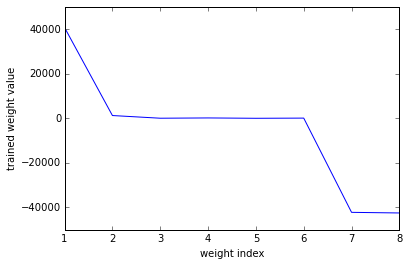

In [401]:
plt.plot(range(1,len(trained_weights)),trained_weights[0:8])
plt.xlabel('weight index')
plt.ylabel('trained weight value')

### As seen below, the number of data points with high residuals (differences in predicted and actual values) are very low, and a majority of the data points fall in a close range around the residual being 0. This indicates that the model has fit well and does a decent job in predicting housing prices. 

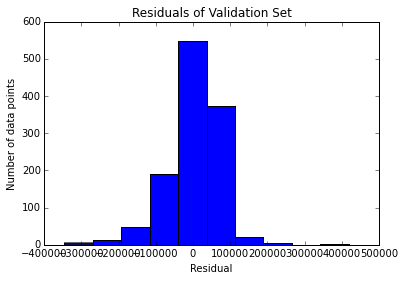

In [39]:
residuals = np.subtract(validation_prediction, Y_validate)
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Number of data points')
plt.title("Residuals of Validation Set")